# Alternative projection

In [1]:
# Getting all the required library
# using JuMP
# using GLPK

using Plots
using LinearAlgebra

In [2]:
# Create the vander function for creating a form of representing the vectors and calculations
vander(t,n) = hcat([t.^i for i = 0:n-1]...)

vander (generic function with 1 method)

In [3]:
# Setting the parameters
T=1:0.01:5 # Interpolation points, note it has to be different from 0 so it's best to pick from 1
(n, m) = (23, 22) # The power of the 2 poly in the rational functions
hy_space_sz = n+m+2
# N = 10
# c = rand(N)
# f(t) = sum([c[i]*sin(π*i*(t+0.25)) for i in 1:N]) # Function to approximate

f(t) = (t^3+3)/(t^2 + 1) #function simple to test

f (generic function with 1 method)

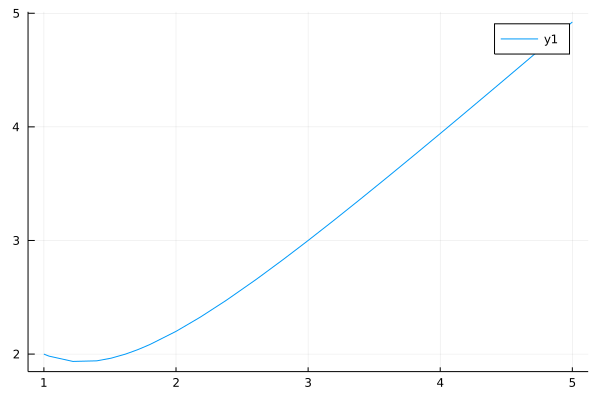

In [4]:
# plot the f to see
plot(f,1,5)

In [5]:
# we are creating hyperplanes by thinking f(x) = p(x)/q(x)
# or converting to <A, xn> - f(x)<B, xm> = 0 with A, B is correspondingly coe of p(x) and q(x) and are the keys
# xn and xm are the vectors which will represent the fucntions
# for easy calculation combining A and B into a big vector so it would be: <A to B, xn to -f(x)xm> = 0
# this is a hyperplan formula with d = 0
# therefore, xn to -f(x)xm is the vector of the hyperplane in R n+m+2 space

# function to calculate the distince between a point and the hyperplane with the sign
function calculateDisAndPoint(big_vect, the_point)
#     calculate distance by |vect.start_point + d|/||vect|| , d is 0 in this case
    a = sum(hcat([the_point[i]*big_vect[i] for i in 1:size(big_vect)[2]]...))
    b = sum(hcat([big_vect[i]*big_vect[i] for i in 1:size(big_vect)[2]]...))
    c = sqrt(b)
    dis = a/c
#     calculate lambda in x - x0 = lambda.vect to calculate the projectpoint
    lambd = a/b
    x0 = the_point - (lambd * big_vect)
    return dis, x0
end

calculateDisAndPoint (generic function with 1 method)

In [6]:
# Calculate the big vector for each hyper plane
num_hy = size(T)[1]
hy_space_sz = n + m + 2
big_vect_Arr = Array{Array{Float64}}(undef, 1, num_hy)
for i in 1:num_hy
    xn = vander(T[i], n+1)
    xm = vander(T[i], m+1)
    big_vect_Arr[i] = hcat(xn, -f(T[i])*xm)
end

In [7]:
# iterate after a certain times and store the value in a array of the size of number of hyperplanes
pointA = Array{Array{Float64}}(undef, 1, num_hy)

error_rate = 0.0001

s_p = vander(1, hy_space_sz)
need_to_cal = true
count = 0

while true
    for i in 1:num_hy
        result = calculateDisAndPoint(big_vect_Arr[i],s_p)
        if isassigned(pointA, i)
            if need_to_cal
                a = pointA[i] - result[2]
                if sqrt(LinearAlgebra.dot(a, a)) > error_rate
                    need_to_cal = false
                end
            end
        else
            need_to_cal = false
        end
        pointA[i] = result[2]
        s_p = result[2]
    end
    count += 1
    if need_to_cal
        break
    else
        need_to_cal = true
    end
end

println("the number of iteration: ", count)

the number of iteration: 1861


In [8]:
# calculate the mid point
mid_p = sum(pointA)/num_hy

1×47 Array{Float64,2}:
 1.25806  1.24986  1.24076  1.2308  1.22005  …  0.613504  0.968585  0.801716

In [9]:
for i in mid_p
#     println(i)
end

In [10]:
# we now have the final results
p(t) = sum((t^(i-1))*mid_p[i] for i in 1:(n+1))
q(t) = sum((t^(i-1))*mid_p[i+n+1] for i in 1:(m+1))
g(t) = p(t)/q(t)

g (generic function with 1 method)

In [11]:
g(1.2)

1.9397174766104583

In [12]:
f(1.2)

1.9377049180327868

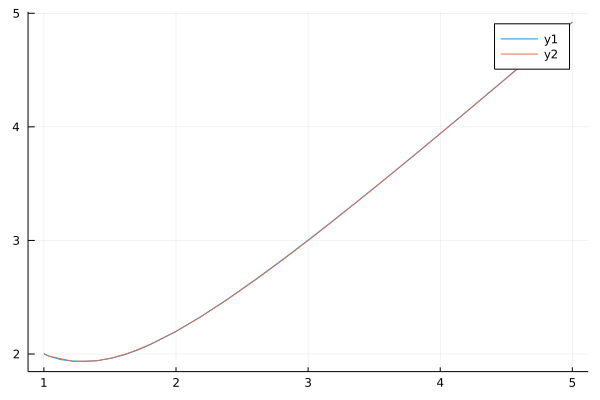

In [13]:
plot(g,1,5)
plot!(f,1,5)

In [14]:
# Find the points of extreme deviation:

σ(t) = g(t) - f(t)
Tmax = maximum(abs.(σ.(T)))
T⁺ = T[findall(t -> σ(t) ≈ Tmax, T)]
T⁻ = T[findall(t -> σ(t) ≈ -Tmax, T)]

Float64[]

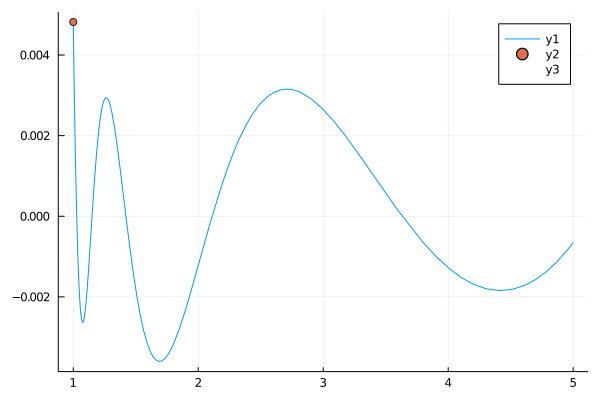

In [15]:
plot(σ,1,5)
scatter!(T⁺,σ.(T⁺))
scatter!(T⁻,σ.(T⁻))

Issues can report on:
- the number of planes and the range to approximate, how many planes is enough and at what range?
- the power of the 2 poly in rational (n and m), higher mean better ? but will that affect the computation
- the number of iteration/computation time corresponding to the error rate, what is the acceptable error rate?
- is calculating the mid point by the avg the best way?
- the case of going to infinity (maybe not that interesting)